## This code is made for Master thesis of Rintaro Kanaki
### Many codes are dopted from the book "Pythonによるディープラーニング" by Francois Chollet
## Adopted by Rintaro Kanaki, and now we compare the modern simple perceptron, multilayer perceptron, deep neural network
### 02.08.2023

## 1. Getting data and import the packages
### first download the boston housing datasets of keras like the canadian bible.
### The training sample has 404 and test sample has 103 and it is classified 13 category
### This is the regression problem

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets)=(boston_housing.load_data())

## 2. Data preprocessing
### here I standardize the input which has zero mean and unit standard deviation

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std  = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## 3. Building model
### here I am using keras.Sequential()
### Unlike original simple perceptron, the sigmoid function is used for simple perceptron

In [3]:
# Perceptron using Keras Sequential API
perceptron_model = Sequential()
perceptron_model.add(Dense(1, input_dim=train_data.shape[1], activation='linear'))

In [10]:
perceptron_model.build(input_shape=train_data.shape) 
perceptron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Multilayer Perceptron (MLP) using Keras Sequential API
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

In [11]:
mlp_model.build(input_shape=train_data.shape) 
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Deep Neural Network (DNN) using Keras Sequential API
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(1, activation='linear'))

In [12]:
dnn_model.build(input_shape=train_data.shape) 
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


## 4. Compling the networks
### Loss is MSE and optimizer is prop

In [6]:
# Compile the perceptron model
perceptron_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# Compile the MLP model
mlp_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# Compile the DNN model
dnn_model.compile(loss='mean_squared_error', optimizer='rmsprop')

## 5. Train the models
### Let's test 100 epochs

In [7]:
# Train the perceptron model and record the loss history
perceptron_history = perceptron_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1);
# Train the MLP model and record the loss history
mlp_history = mlp_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1);
# Train the DNN model and record the loss history
dnn_history = dnn_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
404/404 [==============================] - 1s 823us/step - loss: 601.2203
Epoch 2/100
404/404 [==============================] - 0s 784us/step - loss: 574.2653
Epoch 3/100
404/404 [==============================] - 0s 746us/step - loss: 549.3314
Epoch 4/100
404/404 [==============================] - 0s 779us/step - loss: 526.1555
Epoch 5/100
404/404 [==============================] - 0s 780us/step - loss: 504.8159
Epoch 6/100
404/404 [==============================] - 0s 781us/step - loss: 484.7915
Epoch 7/100
404/404 [==============================] - 0s 777us/step - loss: 465.6945
Epoch 8/100
404/404 [==============================] - 0s 761us/step - loss: 447.5214
Epoch 9/100
404/404 [==============================] - 0s 773us/step - loss: 430.4620
Epoch 10/100
404/404 [==============================] - 0s 784us/step - loss: 413.6784
Epoch 11/100
404/404 [==============================] - 0s 780us/step - loss: 397.8540
Epoch 12/100
404/404 [==============================

## 6. Plot the loss

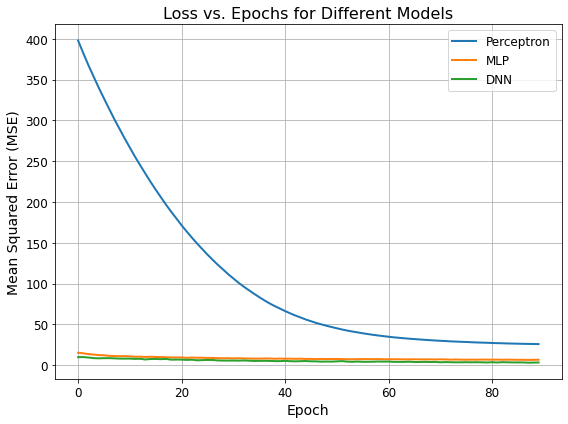

In [16]:
# Plot the loss versus epochs for all models
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.plot(perceptron_history.history['loss'][10:], label='Perceptron', linewidth=2)
plt.plot(mlp_history.history['loss'][10:], label='MLP', linewidth=2)
plt.plot(dnn_history.history['loss'][10:], label='DNN', linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Loss vs. Epochs for Different Models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(labelsize=12)  # Increase tick label font size
plt.tight_layout()  # Adjust spacing between elements
plt.savefig('Plot/loss_DNN_with_Keras.jpg',bbox_inches='tight')
plt.show()

## 7. Evaluate this with test data set

In [9]:
# Evaluate the perceptron model on the test data
perceptron_loss = perceptron_model.evaluate(test_data, test_targets)
print("Perceptron Loss (MSE) on Test Data:", perceptron_loss)

# Evaluate the MLP model on the test data
mlp_loss = mlp_model.evaluate(test_data, test_targets)
print("MLP Loss (MSE) on Test Data:", mlp_loss)

# Evaluate the DNN model on the test data
dnn_loss = dnn_model.evaluate(test_data, test_targets)
print("DNN Loss (MSE) on Test Data:", dnn_loss)

4/4 [==============================] - 0s 1ms/step - loss: 19.3017
Perceptron Loss (MSE) on Test Data: 19.30169105529785
4/4 [==============================] - 0s 1ms/step - loss: 18.7017
MLP Loss (MSE) on Test Data: 18.701719284057617
4/4 [==============================] - 0s 1ms/step - loss: 13.8441
DNN Loss (MSE) on Test Data: 13.844125747680664


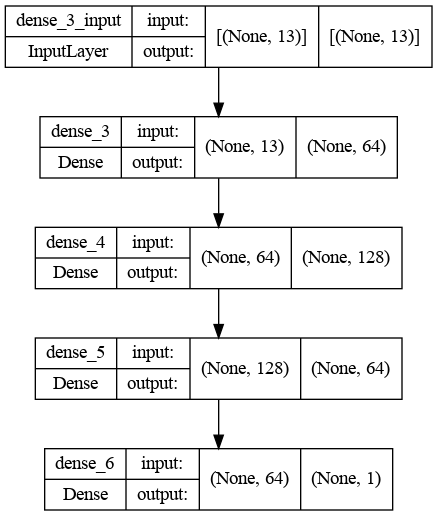

In [20]:
import pydot
from keras.utils.vis_utils import plot_model
from keras.models import Model

# Assuming you have your Keras model defined as "model"
# Replace "model" with the actual name of your model

# Plot the model as a graph
plot_model(perceptron_model, to_file='Plot/perceptron_summary.png', show_shapes=True, show_layer_names=True)
plot_model(mlp_model, to_file='Plot/mlp_summary.png', show_shapes=True, show_layer_names=True)
plot_model(dnn_model, to_file='Plot/dnn_summary.png', show_shapes=True, show_layer_names=True)